<a href="https://colab.research.google.com/github/dorsaalh/Spikey_Neurons_Simulation/blob/main/LIF_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

simulate with constant $I(t)$

In [ ]:
T       =   500.00000                       # total simulation length [s]
dt      =   0.0005                          #  step size [s]
time    =   np.arange(0, T+dt, dt)          # step values [s]

t_spike =   []           #when we have spike add them to this list
I_spike =   []           #when we have spike add them to this list
F_spike =   []

R       =    100
t_m     =    100

u_rest  =    25

I       =    np.zeros(len(time))

V       =    np.empty(len(time))
V[0]    =    0

U       =    np.empty(len(time)+1)

thetha  =    250

In [ ]:
def init_vars():
    global t_spike
    t_spike =   []
    global I_spike
    I_spike =   []
    global I      
    I = np.zeros(len(time))
    global V      
    V = np.empty(len(time))
    V[0] = 0
    global U 
    U = np.empty(len(time)+1)

In [ ]:
def enter_I(t_start,t_finist,I_input):
    start  = int(t_start/dt)
    finist = int(t_finist/dt)
    n = int(T/dt)
    
    if start > n:
        start = n + 1
        
    if finist > n:
        finist = n + 1
    
    I[start:finist]  =  I[start:finist] + I_input

In [ ]:
def simulate_ristict():  
    counter = 0
    global U
    t0 = time[0]
    for i,t in enumerate(time):
        V[i] = R * I[i] *(1 - np.exp((-(t-t0)/t_m)))
        temp = V[i] + u_rest
        
        if temp < thetha :
            U[i] = temp
        else:
            U[i] = u_rest
            counter += 1
            if counter == 2:
                t_spike.append(t-t0)
                I_spike.append(I[i])
            t0 = t

In [ ]:
def make_dataframe():
    data = pd.DataFrame(data = {'u': U[0:U.size-1] , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data

In [ ]:
def plot(data):
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',y='u',color='red'
            ,title = 'U-time',figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=thetha, color='black', linestyle='--')
    
    plt.show()

    f2 = data.plot(kind='line',y='I',color='blue'
            ,title = 'I-time',figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

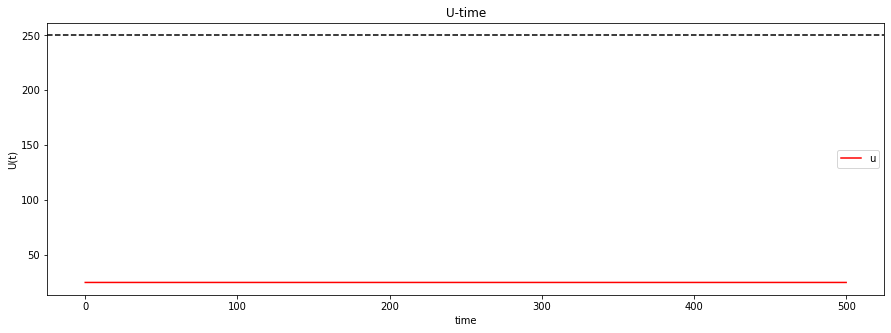

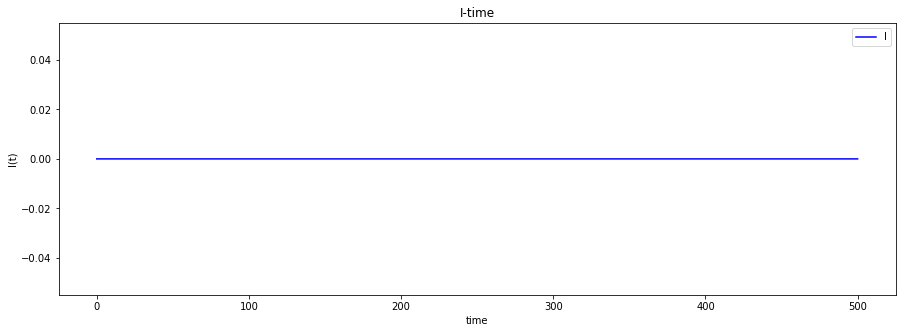

In [ ]:
init_vars()
enter_I(0,T+dt,0)
simulate_ristict()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

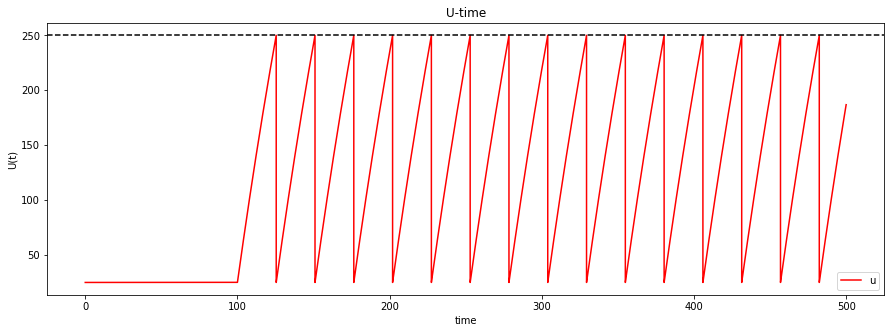

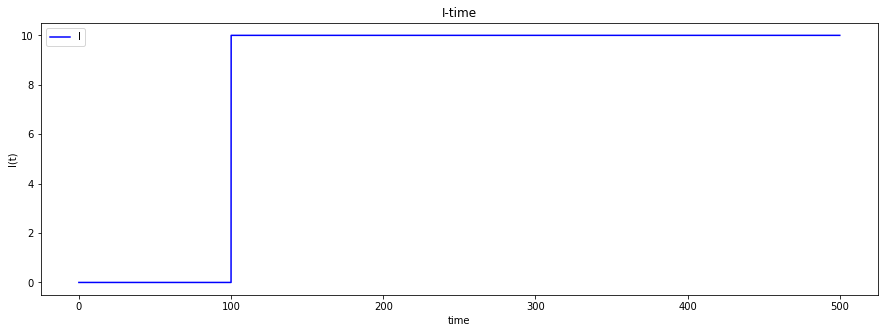

In [ ]:
init_vars()
enter_I(100,T+dt,10)
simulate_ristict()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

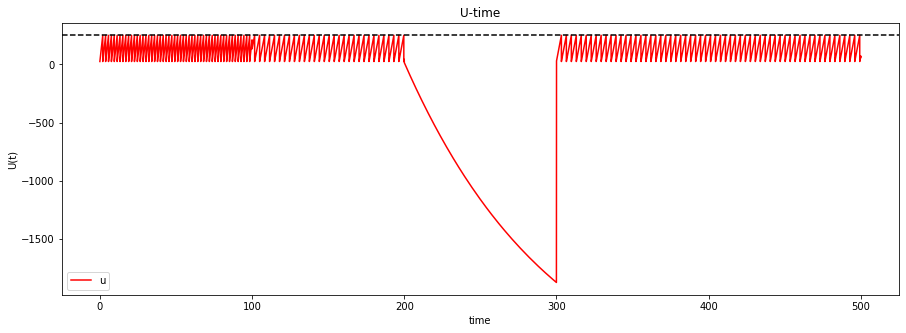

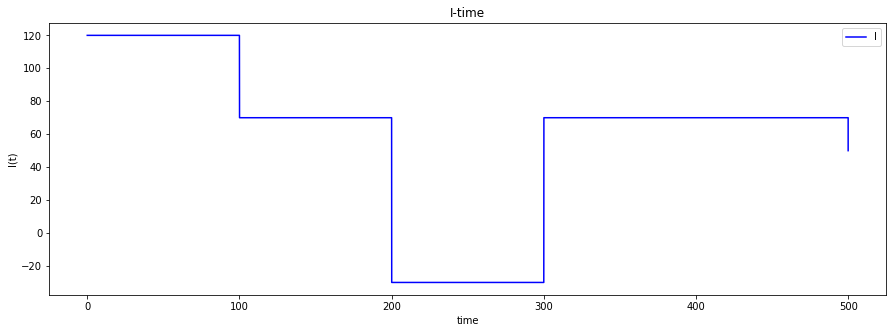

In [ ]:
init_vars()
enter_I(0,T+dt,120)
enter_I(100,500,20)
enter_I(200,300,-100)
enter_I(100,T+dt,-70)
simulate_ristict()
data = make_dataframe()
plot(data)

In [ ]:
init_vars()
enter_I(10,T+dt,3)
simulate_ristict()
data1 = make_dataframe()

init_vars()
enter_I(20,T+dt,6)
simulate_ristict()
data2 = make_dataframe()

init_vars()
enter_I(40,T+dt,9)
simulate_ristict()
data3 = make_dataframe()

init_vars()

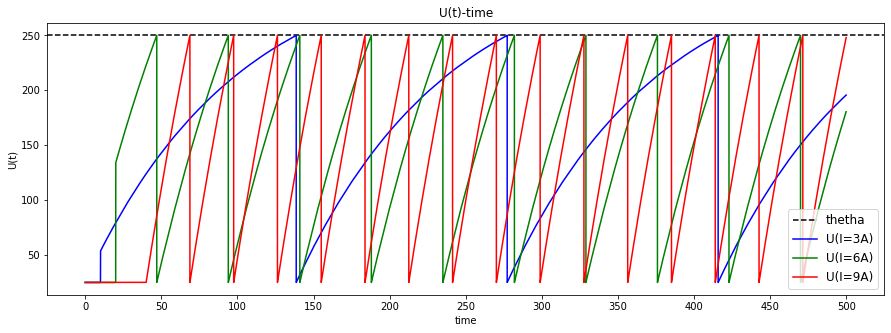

In [ ]:
ax = plt.gca(title = 'U(t)-time')
plt.axhline(y=thetha, color='black', linestyle='--')
data1.plot(kind='line',y='u',color='blue',ax=ax,figsize=(15,5) ,xticks= range(0,1050,50)).set_ylabel('U(t)')
data2.plot(kind='line',y='u', color='green', ax=ax)
data3.plot(kind='line',y='u', color='red', ax=ax)
ax.legend(["thetha","U(I=3A)", "U(I=6A)" , "U(I=9A)"],prop={'size': 12},loc='lower right')

plt.show()

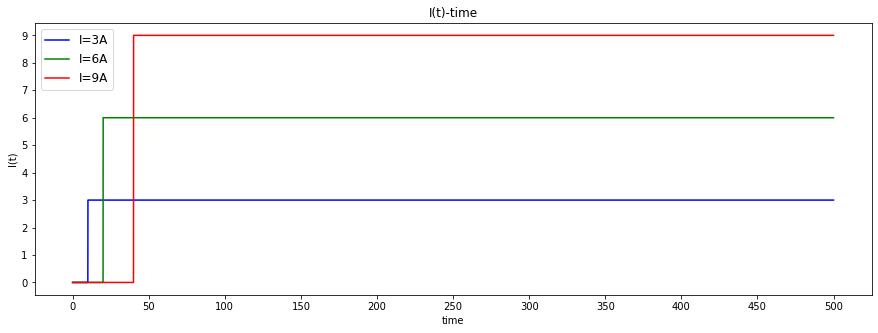

In [ ]:
ax = plt.gca(title = 'I(t)-time')
data1.plot(kind='line',y='I',color='blue',ax=ax ,figsize=(15,5),yticks= range(0,10,1),xticks= range(0,1050,50)).set_ylabel('I(t)')
data2.plot(kind='line',y='I', color='green', ax=ax)
data3.plot(kind='line',y='I', color='red', ax=ax)

ax.legend(["I=3A", "I=6A" , "I=9A"],prop={'size': 12},loc='upper left')

plt.show()

In [ ]:
#release memory
del data1
del data2
del data3

In [ ]:
def plot_F_I(list_t_spike,list_I_spike):
    start_s = 0
    for items in list_t_spike:
        if items != 0:
            start_s = items
            break
    fig = plt.figure(figsize=(10,5))
    plt.axhline(y=start_s, color='black', linestyle='--')
    plt.plot(list_I_spike ,list_t_spike)
    fig.suptitle('F-I chart', fontsize=20)
    plt.xlabel('I', fontsize=18)
    plt.ylabel('F', fontsize=16)
    plt.show()

In [ ]:
list_data = []
list_I_spike = []
list_t_spike = []
for i in range(0,50):
    init_vars()
    enter_I(0,T+dt,0 +(i/10))
    simulate_ristict()
    data = make_dataframe()
    list_data.append(data)
    if len(t_spike)>0:
        list_t_spike.append(round(1/t_spike[0],3))
        list_I_spike.append(I_spike[0])
    elif len(t_spike)== 0:
        list_t_spike.append(0)
        list_I_spike.append(round(0 +(i/10),3))

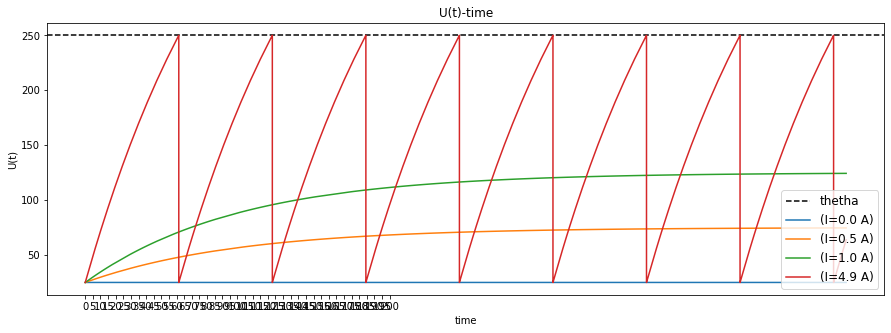

In [ ]:

list_i = []
ax = plt.gca(title = 'U(t)-time')
plt.axhline(y=thetha, color='black', linestyle='--')

for i in [0,5,10,49]:
    if i == 0:
        list_data[i].plot(kind='line',y='u',ax=ax ,figsize=(15,5),
                          xticks= range(0,205,5)).set_ylabel('U(t)')
    else:
        list_data[i].plot(kind='line',y='u',ax=ax)
        
    list_i.append(0 +(i/10))
    
    
ax.legend(["thetha" ,"(I=" + str(list_i[0]) +" A)", "(I=" + str(list_i[1]) +" A)" 
           , "(I=" + str(list_i[2]) +" A)"
           , "(I=" + str(list_i[3]) +" A)"
          ],prop={'size': 12},loc='lower right')   

In [ ]:
#release memory
del list_data

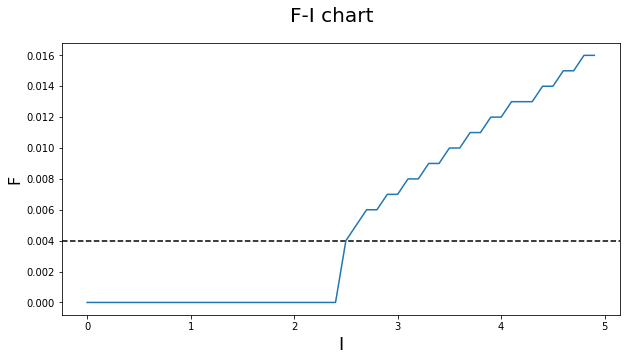

In [ ]:
plot_F_I(list_t_spike,list_I_spike)

simulate with changing $I(t)$

In [ ]:
#Init variables
T       =   100.00000                     # total simulation length [s]
dt      =   0.1                       #  step size [s]
time    =   np.arange(0, T+dt, dt)        # step values [s]


R       =    100
t_m     =    25 #100

u_rest  =    25

I       =    np.zeros(len(time))

U       =    np.empty(len(time)+1)
U[0]    =    u_rest

thetha  =    250

<Figure size 1800x1080 with 0 Axes>

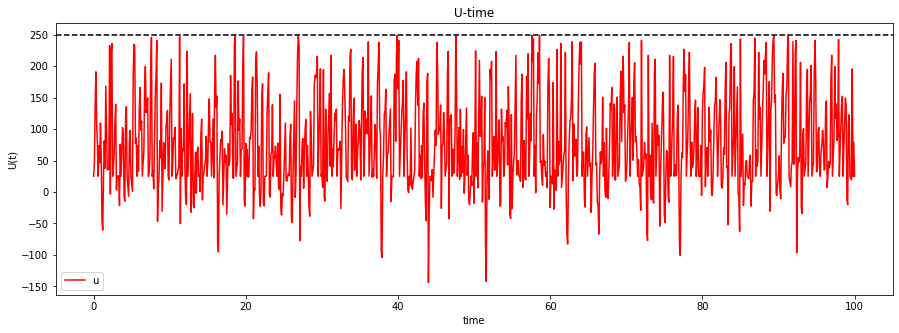

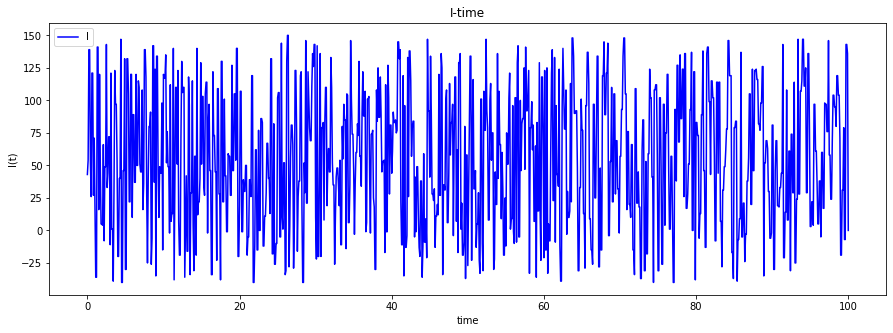

In [ ]:
n = 1
for i in range(0,int(T/(n*dt))):
    I_random = round(randint(-40,150),3)
    enter_I(round(i*(n*dt),4),round((i+1)*(n*dt),4),I_random)
simulate_ristict()
data = make_dataframe()
plot(data)